# Project Title : Bike Sharing Demand Prediction

<img src="Table4.jpeg" alt="Drawing"/> 

# Problem Description:
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes

<img src="Table2.jpg" alt="Drawing"/> 




# 1. Import library 

In [1]:
# Load the necessary python libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings('ignore')


## Load the dataset

In [2]:
# Load the dataset
dataEDA=pd.read_csv("hour.csv")

In [3]:
dataEDA.shape

(17379, 17)

# 2. Pre processing

## Checking the sturcture of data

In [4]:
dataEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Inference :

Dataset has 730 rows and 16 columns.

Except one dteday column, all other are either float or integer type.

We will analyse the categorical variables and onvert them to as required.

 ## Checking for null values is the data

In [5]:
dataEDA.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the dataset

In [6]:
df_trainEx, df_test =train_test_split(dataEDA , test_size = 0.2 , random_state=40)

In [7]:
df_trainEx.shape

(13903, 17)

In [8]:
df_test.shape

(3476, 17)

In [9]:
# Rename column 
df_trainEx = dataEDA.rename(columns = {'instant':'rec_id', 'dteday':'datetime','weathersit':'weather', 'cnt':'total_count', 'dteday':'datetime','mnth':'month','temp':'temperature','holiday':'is_holiday', 'workingday':'is_workingday','hum':'humidity','yr':'year'})


In [10]:
#check duplicate
dataEDA.duplicated().sum()

0

## Identifying the outliers:

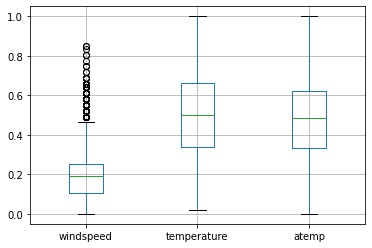

In [11]:
boxplot = df_trainEx.boxplot(column=['windspeed','temperature','atemp'])

In [12]:
Outlier_col= df_trainEx[[ 'windspeed','temperature','atemp']]

In [13]:
#Q1 = df_trainEx.quantile(0.25)
#Q3 = df_trainEx.quantile(0.75)

In [14]:
#IQR = Q3 - Q1
#df_trainEx =df_trainEx[~((df_trainEx < (Q1 - 1.5 * IQR)) |(df_trainEx > (Q3 + 1.5 * IQR))).any(axis=1)]

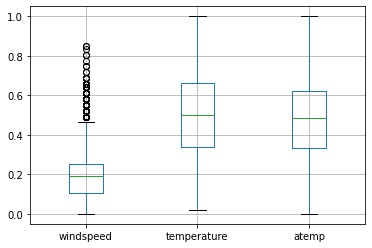

In [15]:
boxplot = df_trainEx.boxplot(column=['windspeed','temperature','atemp'])

Converting the below mentioned categorical variables to object datatype by mapping

season,
year,
weather,
weekday,
is_holiday,
is_workingday

In [16]:
#change value in each column 
df_trainEx['season'] = df_trainEx['season'].map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})
df_trainEx['year'] = df_trainEx['year'].map({0:'2011', 1:'2012'})
df_trainEx['is_holiday'] = df_trainEx['is_holiday'].map({0:'No', 1:'Yes'})
df_trainEx['weekday'] = df_trainEx['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df_trainEx['is_workingday'] = df_trainEx['is_workingday'].map({0:'No', 1:'Yes'})
df_trainEx['weather'] = df_trainEx['weather'].map({1:'Clear', 2:'Cloudy', 3:'Rain', 4:'Storm'})

In [17]:
df_trainEx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rec_id         17379 non-null  int64  
 1   datetime       17379 non-null  object 
 2   season         17379 non-null  object 
 3   year           17379 non-null  object 
 4   month          17379 non-null  int64  
 5   hr             17379 non-null  int64  
 6   is_holiday     17379 non-null  object 
 7   weekday        17379 non-null  object 
 8   is_workingday  17379 non-null  object 
 9   weather        17379 non-null  object 
 10  temperature    17379 non-null  float64
 11  atemp          17379 non-null  float64
 12  humidity       17379 non-null  float64
 13  windspeed      17379 non-null  float64
 14  casual         17379 non-null  int64  
 15  registered     17379 non-null  int64  
 16  total_count    17379 non-null  int64  
dtypes: float64(4), int64(6), object(7)
memory usage: 2

In [18]:
df_trainEx.head()

,rec_id,datetime,season,year,month,hr,is_holiday,weekday,is_workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,1,0,No,Sunday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
df_trainEx.sample(5)

,rec_id,datetime,season,year,month,hr,is_holiday,weekday,is_workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
7601,7602,2011-11-18,Fall,2011,11,8,No,Saturday,Yes,Clear,0.22,0.2273,0.44,0.1940,6,369,375
888,889,2011-02-09,Winter,2011,2,12,No,Thursday,Yes,Cloudy,0.18,0.1818,0.40,0.2239,4,57,61
12491,12492,2012-06-09,Spring,2012,6,16,No,Sunday,No,Clear,0.82,0.6970,0.24,0.1940,219,315,534
4798,4799,2011-07-23,Summer,2011,7,20,No,Sunday,No,Clear,0.82,0.8030,0.59,0.2239,47,98,145
4872,4873,2011-07-26,Summer,2011,7,22,No,Wednesday,Yes,Clear,0.76,0.6970,0.55,0.1343,27,131,158


In [20]:
df_trainEx.describe()

,rec_id,month,hr,temperature,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,6.537775,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,3.438776,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,4.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,10.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## To get the types of weather in our dataset:

In [21]:
df_trainEx.weather.unique()

array(['Clear', 'Cloudy', 'Rain', 'Storm'], dtype=object)

## To get the types of season in our dataset:

In [22]:
df_trainEx.season.value_counts()

Summer    4496
Spring    4409
Winter    4242
Fall      4232
Name: season, dtype: int64

## To get the types of year in our dataset:

In [23]:
df_trainEx.year.unique()

array(['2011', '2012'], dtype=object)

In [24]:
df_trainEx.year.value_counts()

2012    8734
2011    8645
Name: year, dtype: int64

## To get the types of weekday in our dataset:

In [25]:
df_trainEx.weekday.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [26]:
df_trainEx.weekday.value_counts()

Sunday       2512
Monday       2502
Saturday     2487
Tuesday      2479
Thursday     2475
Friday       2471
Wednesday    2453
Name: weekday, dtype: int64

## To get the types of holiday in our dataset:

In [27]:
df_trainEx.is_holiday.unique()

array(['No', 'Yes'], dtype=object)

## To get the types of month in our dataset:

In [28]:
df_trainEx.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

# 3. Data Visualisation

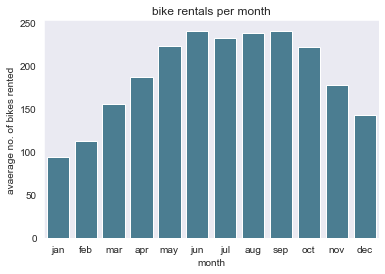

In [70]:
months = 'jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec'.split(',')
ax = sns.barplot('month', 'total_count', data=df_trainEx, estimator=np.mean, color='xkcd:dirty blue',ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('month')
ax.set_xticklabels(months)
sns.set_style("darkgrid")
plt.title('bike rentals per month')

plt.show()

From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season

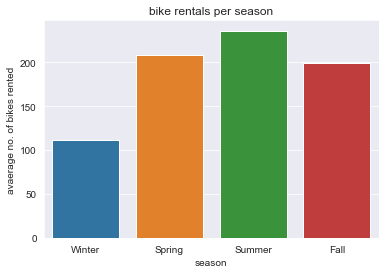

In [30]:
#season = 'Springer,Summer,Fall,Winter'.split(',')
ax = sns.barplot('season', 'total_count', data=df_trainEx, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('season')
#ax.set_xticklabels(season)
sns.set_style("dark")
plt.title('bike rentals per season')

plt.show()


In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,
In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.
In winter season the use of rented bike is very low because of snowfall

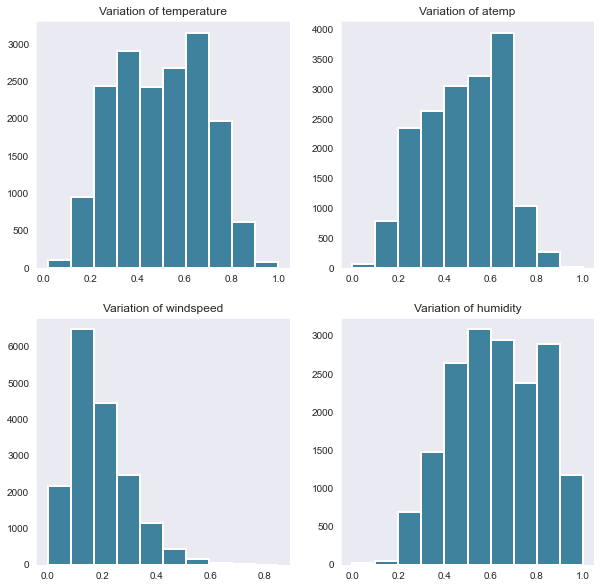

In [31]:
df_trainEx.temperature.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temperature",data=df_trainEx,linewidth=2,color='xkcd:dirty blue')
axes[0,0].set_title("Variation of temperature")
axes[0,1].hist(x="atemp",data=df_trainEx,linewidth=2,color='xkcd:dirty blue')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df_trainEx,linewidth=2,color='xkcd:dirty blue')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df_trainEx,linewidth=2,color='xkcd:dirty blue')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

- In general, temperature has negative correlation with the bike demands. So, as the temperature increases, the bike count also increases.
- Due to Wind speed , there is certain increase in the bike count but the change is very small.
- Humidity acts as a deterrent to a bike ride. The bike count decreases when the humidity increases.

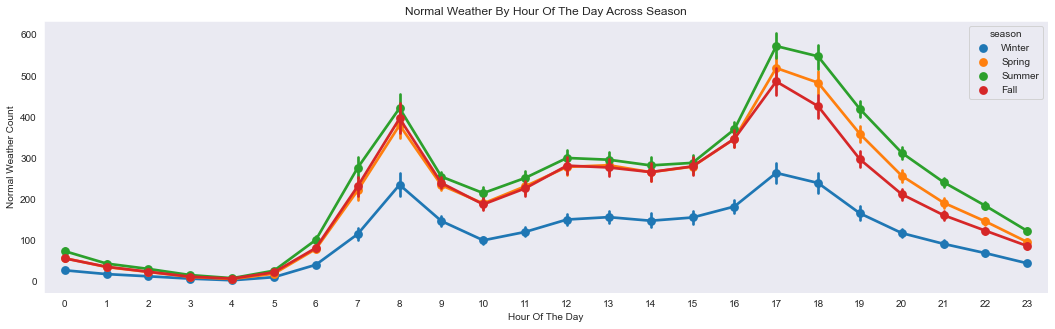

In [32]:
fig, ax = plt.subplots(figsize=(18, 5))
#seasons = ['spring', 'summer', 'fall', 'winter']
#ax.set_xticklabels(seasons)
sns.set_style("dark")

sns.pointplot(x=df_trainEx["hr"], y=df_trainEx["total_count"], hue=df_trainEx["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");


We can see high demand during the office timings around 8 A.M. and 8 P.M., also for early morning and late evening we are having a relatably different trends. And, definately low demand between 8 A.M. and 8 P.M

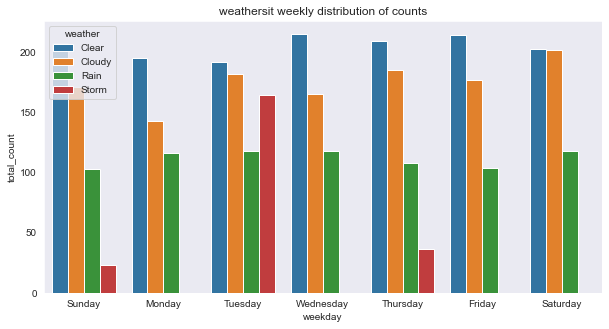

In [33]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='weekday',y='total_count',data= df_trainEx,hue='weather',ax=ax,ci=None)
ax.set_title('weathersit weekly distribution of counts')
sns.set_style("dark")

plt.show()

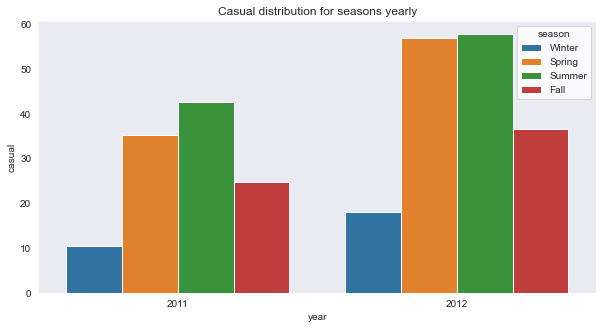

In [34]:
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='year',y='casual',data=df_trainEx,hue='season',ax=ax,ci=None)
sns.set_palette("dark")
Years = '2011,2012'.split(',')
ax.set_xticklabels(Years)
ax.set_title('Casual distribution for seasons yearly')
plt.show()

is more in 2012 compared 2011

In [35]:
dataEDA.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Here we see at the weekend(Sunday) Bike goes to be rented less compare to the working days

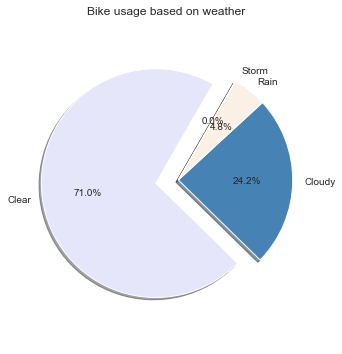

In [36]:
plt.figure(figsize=(5, 6))

labels = ['Clear', 'Cloudy', 'Rain', 'Storm']
sizes = df_trainEx.total_count.groupby(df_trainEx.weather).sum().tolist()


colors = ['lavender', 'steelblue', 'linen', 'silver']
explode = (0.2, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.title('Bike usage based on weather')
plt.show()


Clear skies have most occured with the 2 year period whereas Storm occurence are zero.

In [37]:
data=df_trainEx.drop(['rec_id','datetime','casual','registered','month', 'is_holiday','weekday','is_workingday', 'atemp','hr'], axis=1)


 Visualising numerical variables through pairplot

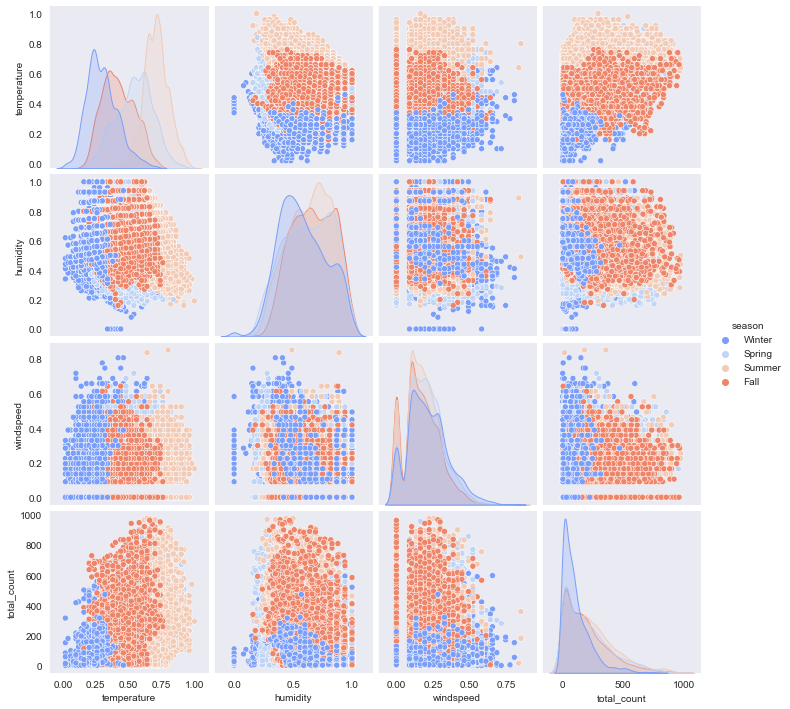

In [38]:
sns.set_style("dark")


sns.pairplot(data,hue='season',palette='coolwarm');



In [39]:
data['windspeed']=data['windspeed'].replace(0, np.nan)
data['temperature']=data['temperature'].replace(0, np.nan)
data['humidity']=data['humidity'].replace(0, np.nan)


In [40]:
data=data.dropna(subset=['windspeed', 'temperature','humidity'])

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15177 entries, 5 to 17378
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       15177 non-null  object 
 1   year         15177 non-null  object 
 2   weather      15177 non-null  object 
 3   temperature  15177 non-null  float64
 4   humidity     15177 non-null  float64
 5   windspeed    15177 non-null  float64
 6   total_count  15177 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 948.6+ KB


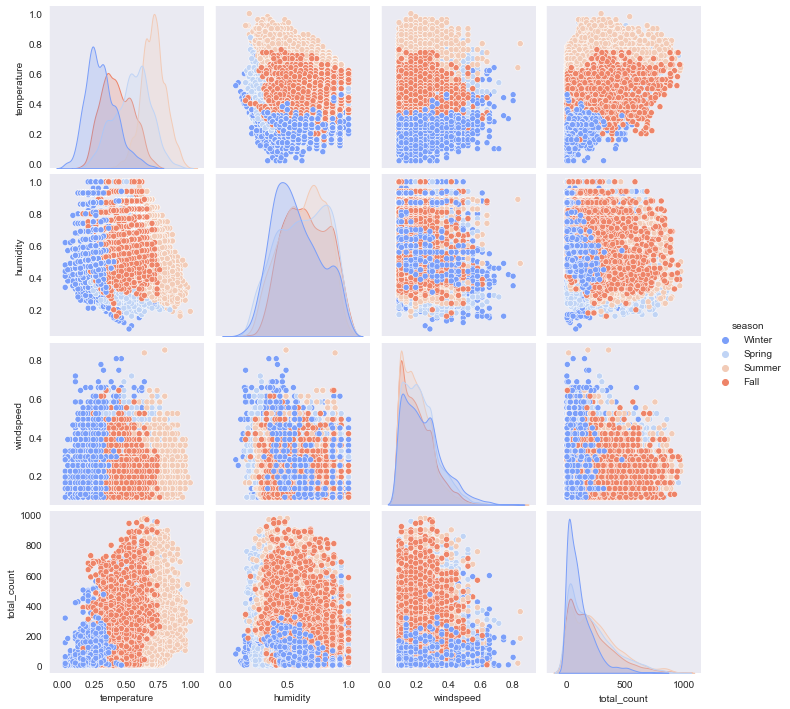

In [42]:
sns.set_style("dark")
ax.set_title('after delete outlier in windspeed')
sns.pairplot(data,hue='season',palette='coolwarm');

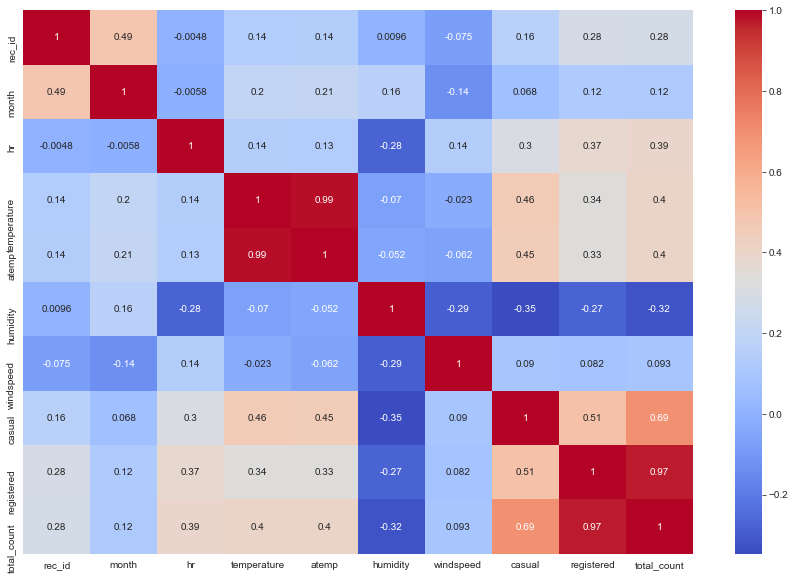

In [43]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_trainEx.corr(), annot=True, cmap='coolwarm');

Finding

The correlation between "temp" and "atemp" is pretty strong so that we only use one of them as feature if needed

In [44]:
data=pd.read_csv("hour.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:


data = data.rename(columns = {'instant':'rec_id', 'dteday':'datetime','weathersit':'weather', 'cnt':'total_count', 'dteday':'datetime','mnth':'month','temp':'temperature','holiday':'is_holiday', 'workingday':'is_workingday','hum':'humidity','yr':'year'})


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rec_id         17379 non-null  int64  
 1   datetime       17379 non-null  object 
 2   season         17379 non-null  int64  
 3   year           17379 non-null  int64  
 4   month          17379 non-null  int64  
 5   hr             17379 non-null  int64  
 6   is_holiday     17379 non-null  int64  
 7   weekday        17379 non-null  int64  
 8   is_workingday  17379 non-null  int64  
 9   weather        17379 non-null  int64  
 10  temperature    17379 non-null  float64
 11  atemp          17379 non-null  float64
 12  humidity       17379 non-null  float64
 13  windspeed      17379 non-null  float64
 14  casual         17379 non-null  int64  
 15  registered     17379 non-null  int64  
 16  total_count    17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 

In [46]:
categoricalFeatureNames = ["season","is_holiday","is_workingday","weather","weekday","month","year","hr"]
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [47]:
data.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hr', 'is_holiday',
       'weekday', 'is_workingday', 'weather', 'temperature', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   rec_id         17379 non-null  int64   
 1   datetime       17379 non-null  object  
 2   season         17379 non-null  category
 3   year           17379 non-null  category
 4   month          17379 non-null  category
 5   hr             17379 non-null  category
 6   is_holiday     17379 non-null  category
 7   weekday        17379 non-null  category
 8   is_workingday  17379 non-null  category
 9   weather        17379 non-null  category
 10  temperature    17379 non-null  float64 
 11  atemp          17379 non-null  float64 
 12  humidity       17379 non-null  float64 
 13  windspeed      17379 non-null  float64 
 14  casual         17379 non-null  int64   
 15  registered     17379 non-null  int64   
 16  total_count    17379 non-null  int64   
dtypes: category(8), float64(4), int

In [49]:
data['windspeed']=data['windspeed'].replace(0, np.nan)
data['humidity']=data['humidity'].replace(0, np.nan)
data.isna().sum()

rec_id              0
datetime            0
season              0
year                0
month               0
hr                  0
is_holiday          0
weekday             0
is_workingday       0
weather             0
temperature         0
atemp               0
humidity           22
windspeed        2180
casual              0
registered          0
total_count         0
dtype: int64

In [50]:
data=data.dropna(subset=['windspeed','humidity'])

In [51]:
data1=data

In [52]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)


In [53]:
data.dropna(inplace=True)

# 3. Beasline

In [54]:
data = pd.concat([data, pd.get_dummies(data['season'], prefix='Season',drop_first=True)],axis=1)
data = pd.concat([data, pd.get_dummies(data['hr'], prefix='hr',drop_first=True)],axis=1)


data= data.drop(["season","hr"],axis=1)

In [55]:
X, y = data.drop(['datetime','rec_id','total_count','casual', 'atemp','registered','weekday','is_holiday'],axis=1), data['total_count']


In [56]:
X.shape

(15177, 33)

# 4. Splitting the dataset into the Training set and Test set

In [57]:
# Splitting the dataset into the Training set and Test set
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=42)


In [58]:
X.columns

Index(['year', 'month', 'is_workingday', 'weather', 'temperature', 'humidity',
       'windspeed', 'Season_2', 'Season_3', 'Season_4', 'hr_1', 'hr_2', 'hr_3',
       'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
       'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19',
       'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

# 5. Models

In [59]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.01)

#Feature transforms for train, val, and test so that we can run our poly model on each
lasso_model = Lasso(alpha = 0.01)
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [60]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lasso_model.fit(X_train_scaled, y_train)
print(f'Lasso Regression val R^2: {lasso_model.score(X_val_scaled, y_val):.3f}')



lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.671
Ridge Regression val R^2: 0.671
Lasso Regression val R^2: 0.671
Degree 2 polynomial regression val R^2: 0.902


In [61]:
selected_columns = ['year', 'month', 'weekday', 'is_workingday', 'weather',
       'temperature', 'humidity', 'windspeed','hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7',
       'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15',
       'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23',
       'season_2', 'season_3', 'season_4', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23' ]

In [62]:
list(zip(selected_columns, lasso_model.coef_))


[('year', 42.257051277458444),
 ('month', -1.1327737247547696),
 ('weekday', 1.9427066546449543),
 ('is_workingday', -14.508316094593612),
 ('weather', 50.19056643598381),
 ('temperature', -17.682821718524412),
 ('humidity', -7.154365476418048),
 ('windspeed', 18.943477467472995),
 ('hr_1', 12.988691361832558),
 ('hr_2', 29.142746989350524),
 ('hr_3', -3.4461773464863),
 ('hr_4', -5.804099134344129),
 ('hr_5', -6.844764689960894),
 ('hr_6', -7.315358726718782),
 ('hr_7', -4.303639667305275),
 ('hr_8', 7.136142611813577),
 ('hr_9', 34.784082331759),
 ('hr_10', 56.863716958804),
 ('hr_11', 32.12003288716132),
 ('hr_12', 20.848842215554864),
 ('hr_13', 28.011523639674714),
 ('hr_14', 35.47305336111174),
 ('hr_15', 32.786349764603955),
 ('hr_16', 30.36031497325243),
 ('hr_17', 32.84790598688688),
 ('hr_18', 46.10927818382166),
 ('hr_19', 76.33034577743176),
 ('hr_20', 70.57438263347959),
 ('hr_21', 46.51309069676226),
 ('hr_22', 31.05982118611857),
 ('hr_23', 20.932558223558882),
 ('season

In [63]:
i=[('polynomial',PolynomialFeatures(degree=2),'modal',LinearRegression())]

In [64]:
preds = lm.predict(X_test)

# 6. Veasilaztion result

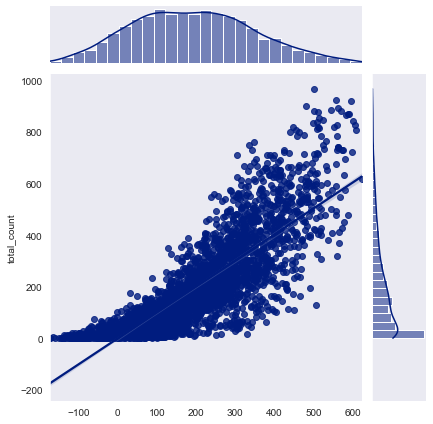

In [65]:
sns.jointplot(x=preds,y=y_test, kind='reg');

In [66]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.693


<img src="Table4.jpeg" alt="Drawing"/> 